#1. 시계열 데이터?

- **시계열분석 Target 데이터: 최소 시계열/시계열횡단면/패널 데이터 (횡단면 데이터 시계열분석 불가)**  
- **시계열분석 시간축: 초/분/시/일/월/년 등 (Tick 단위 이하 및 빛의 속도 이상 제외)**  

| ' | 횡단면 데이터(Cross Sectional) | 시계열 데이터(Time Series) | 시계열 횡단면 데이터(Pooled Cross Section) | 패널 데이터(Panel) |
|--------------------------------|-----------------------------------------|--------------------------------------------|------------------------------------|---------------------------------------------|
| 정의 | 특정시점 + 다수독립변수 | 다수시점 + 특정독립변수 | 다수독립변수 + 다수시점 | 다수독립변수 + 다수시점 (동일 변수 및 시점) |
| 예시 | 2016년 16개 시도의 GRDP와 최종소비 | 연도별 전국 GRDP와 최종소비 | 연도별 16개 시도의 GRDP와 최종소비 | 연도별 16개 시도의 GRDP와 최종소비 |
| 특징 | 값 독립적, 모집단 중 특정 시점 표본추출 | 값 Serial-correlation/Trend/Seasonality 등 | 시점/변수 불일치로 공백 가능 | 시점/변수 일치로 연구자들이 가장 선호 |

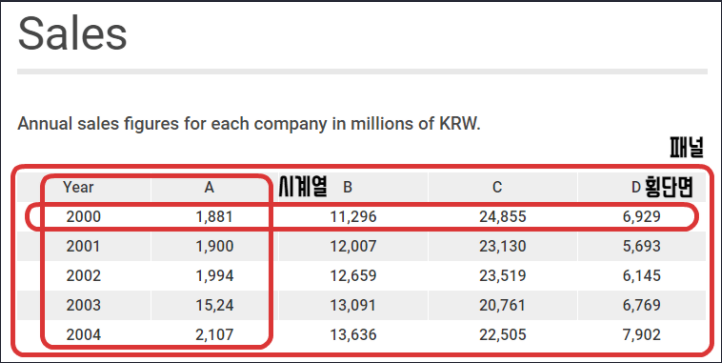

# 2. 시계열 데이터 처리

- Sequential Dataset
 - Feature의 길이: Sequence Length ( = Window Size)
 - 예측할 길이: STep
 - 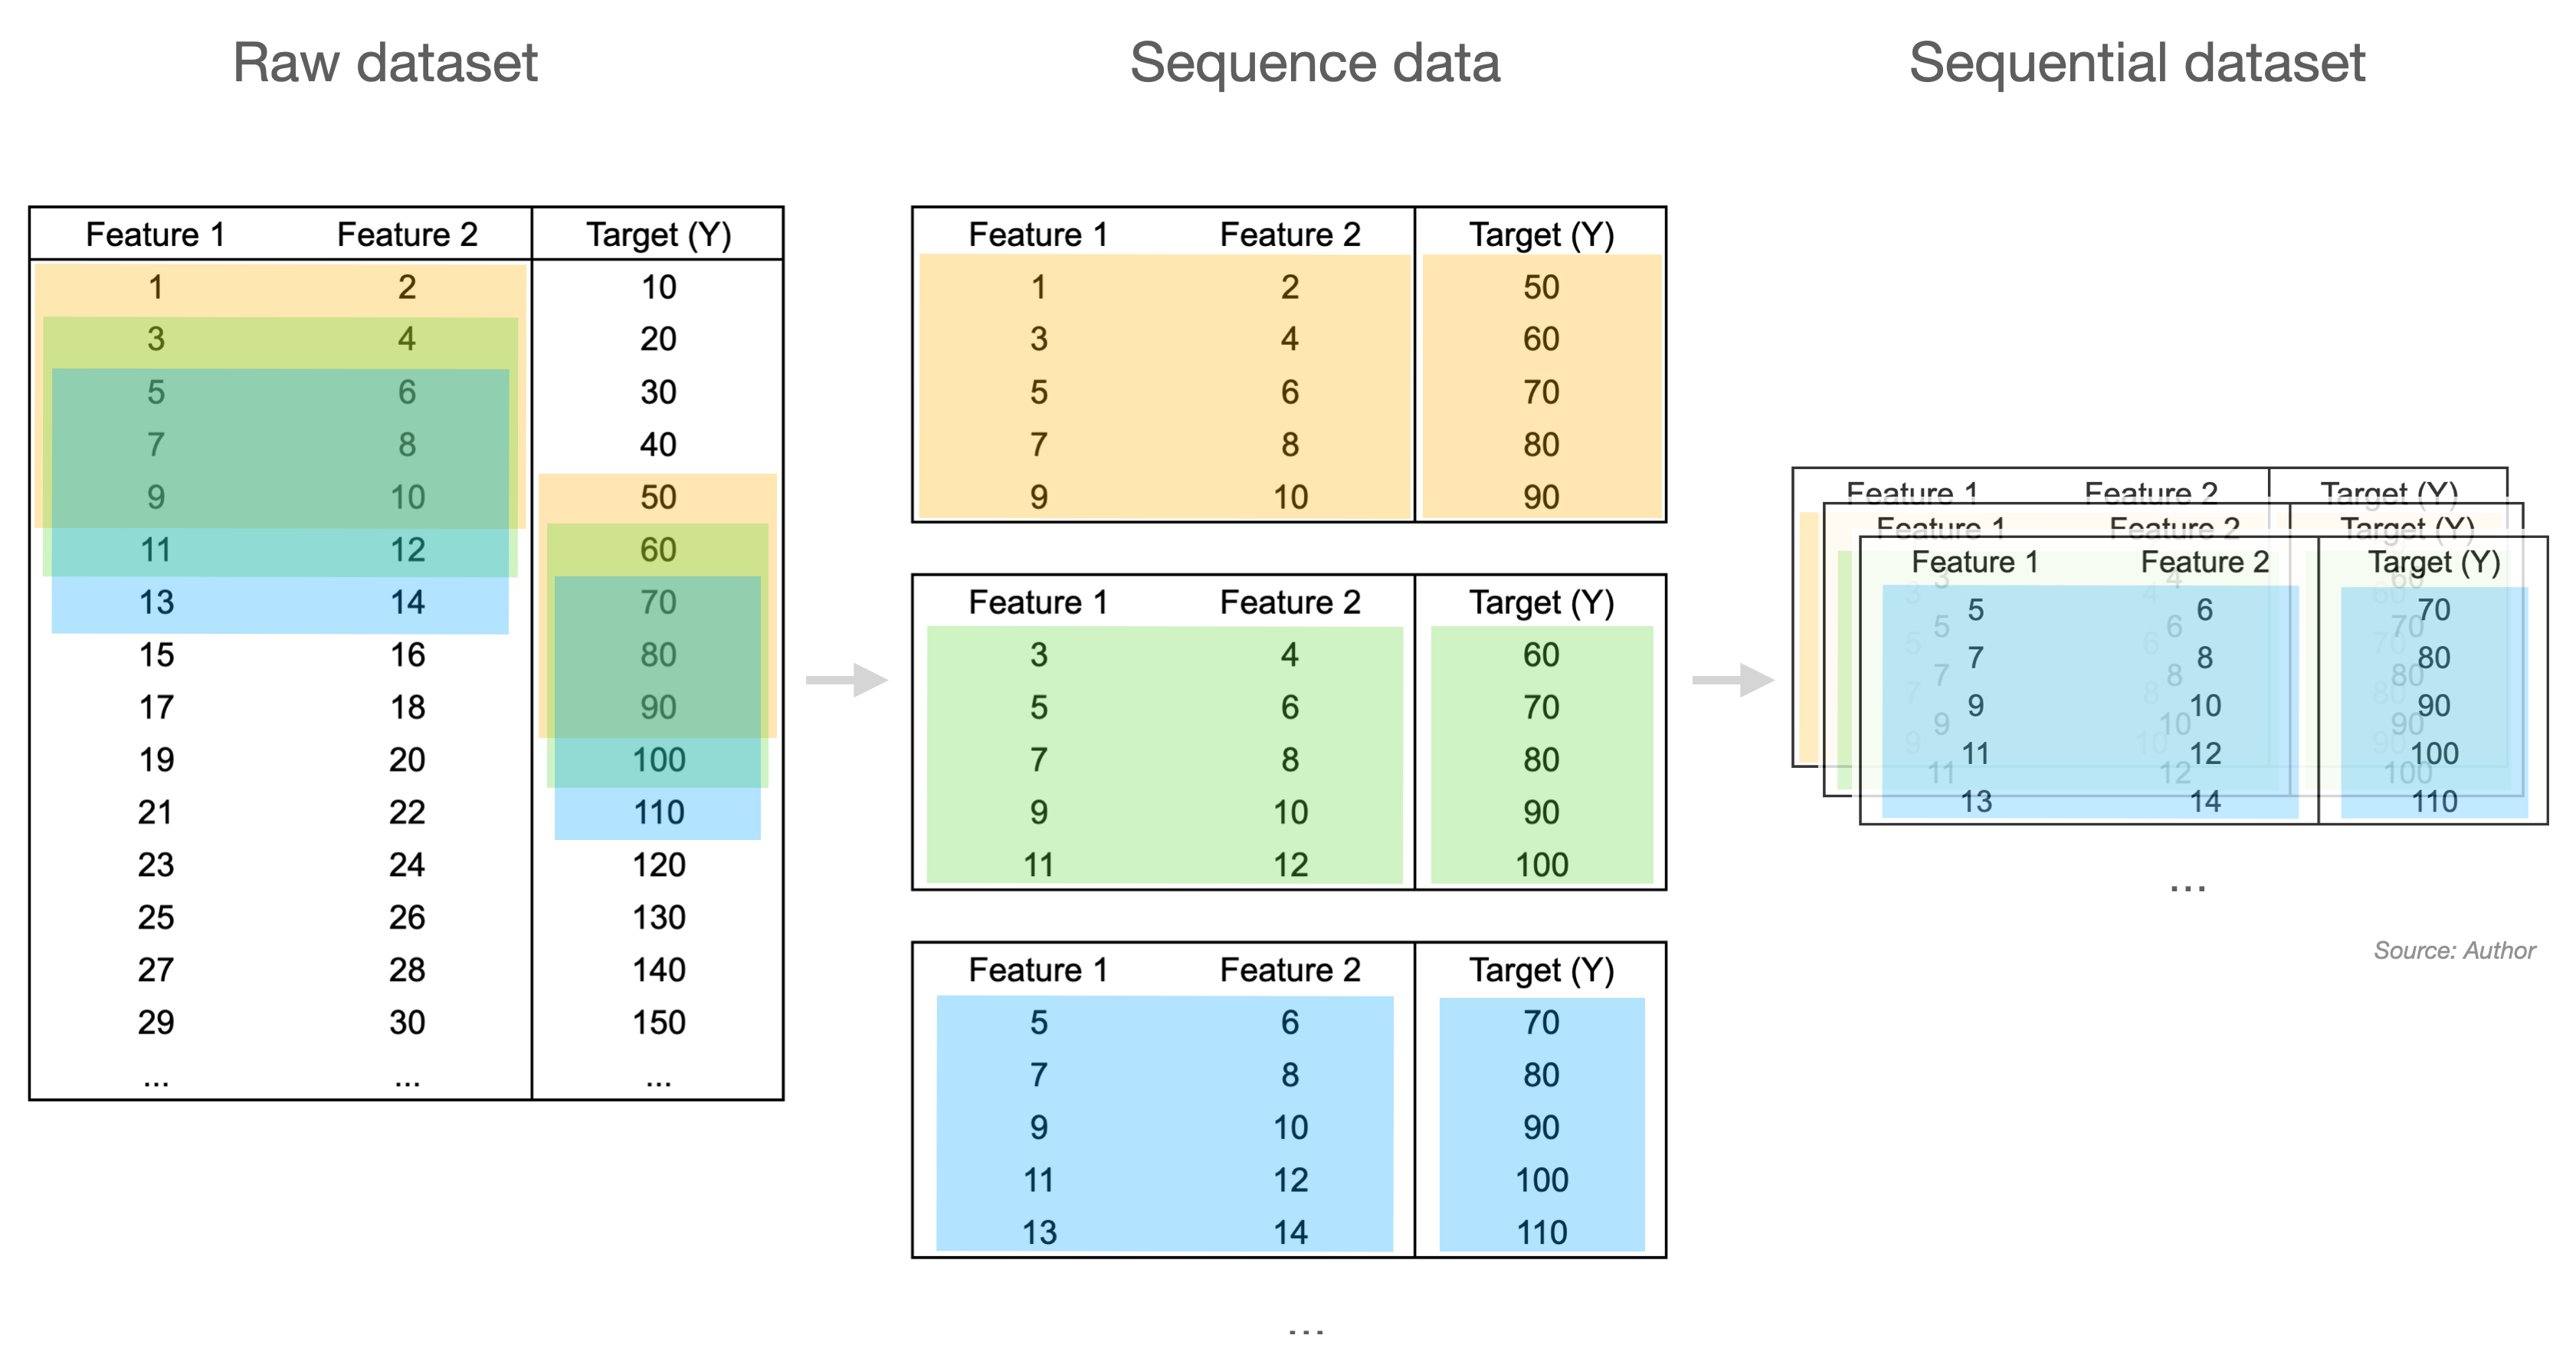

 - 예측값: 1개, step=5
 - 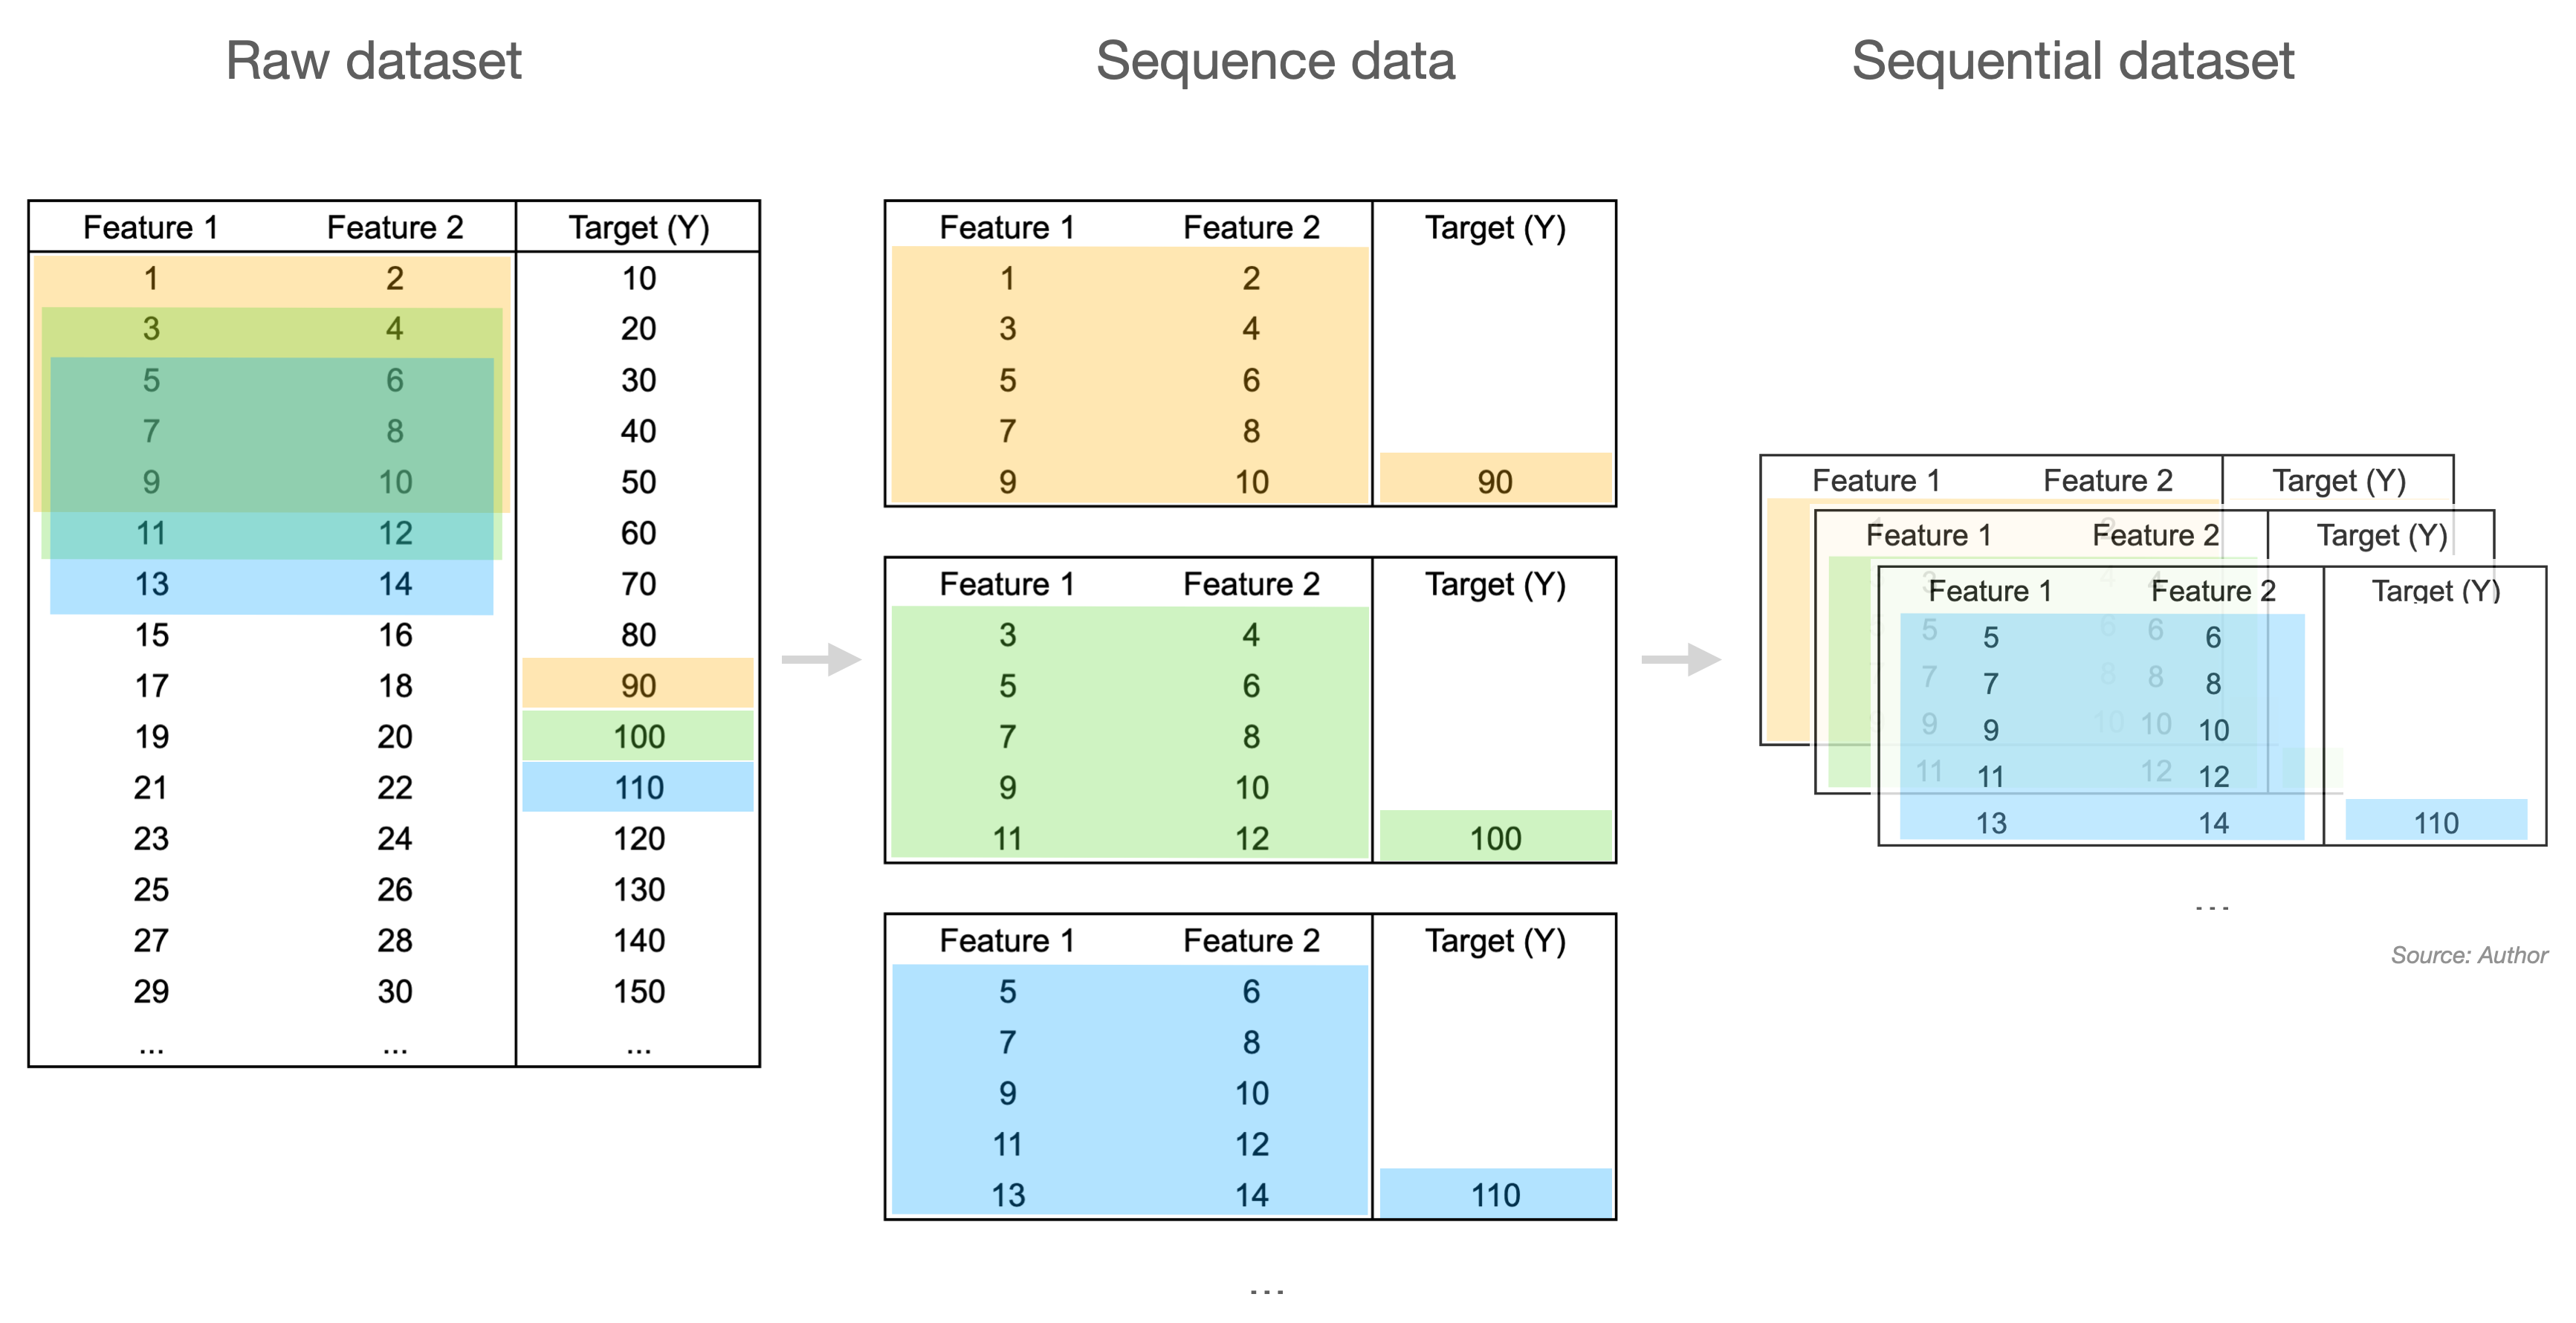

- 예제 시계열 만들기

In [7]:
import numpy as np
import matplotlib.pyplot as plt

xarr = np.array([100,200,300,400])
yarr = np.array([1,2,3,4])
cond = ([True,False,True,False])
np.where(cond,xarr,yarr) #cond True->xarr, False ->yarr

array([100,   2, 300,   4])

In [8]:
np.random.seed(2020)
time = np.arange(30 * 12 + 1)
month_time = (time % 30) / 30

In [9]:
time_series = 20 * np.where(month_time < 0.5,
                          np.cos(2 * np.pi * month_time),
                          np.cos(2 * np.pi * month_time) + np.random.random(361))


In [10]:
time_series

import pandas as pd
ts = pd.DataFrame( time_series)

#75% train, 25% test,,,,,
ts[0:250]
ts[250:]

,0
250,-10.000000
251,-13.382612
252,-16.180340
253,-18.270909
254,-19.562952
...,...
356,32.976413
357,28.864236
358,34.389019
359,22.673496


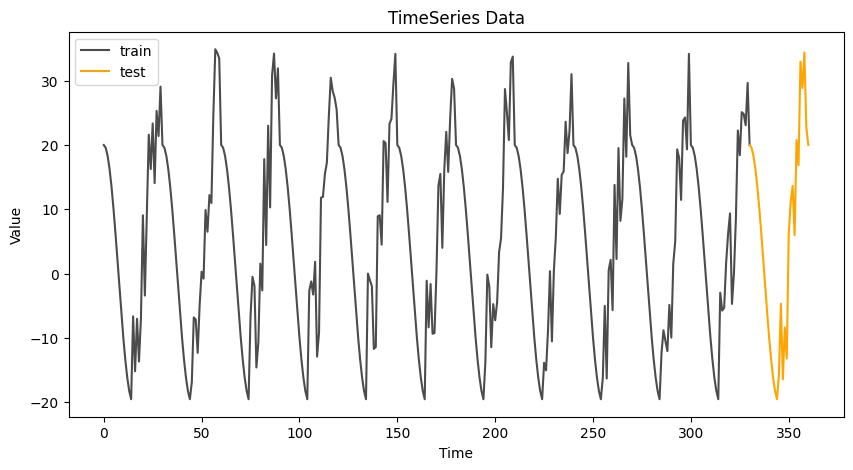

In [11]:
plt.figure(figsize = (10, 5))
plt.title('TimeSeries Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(np.arange(0, 30 * 11 + 1), time_series[:30 * 11 + 1], color = 'black', alpha = 0.7, label = 'train') # 학습용 데이터
plt.plot(np.arange(30 * 11, 30 * 12 + 1), time_series[30 * 11:], color = 'orange', label = 'test') # 테스트용 데이터
plt.legend()

- 자료 읽어서 시계열

,Close
Date,
2019-04-18,-0.001680
2019-04-22,0.013668
2019-04-23,0.019134
2019-04-24,-0.011512
2019-04-25,0.000263
...,...
2020-04-09,-0.000117
2020-04-13,0.059905
2020-04-14,0.051424


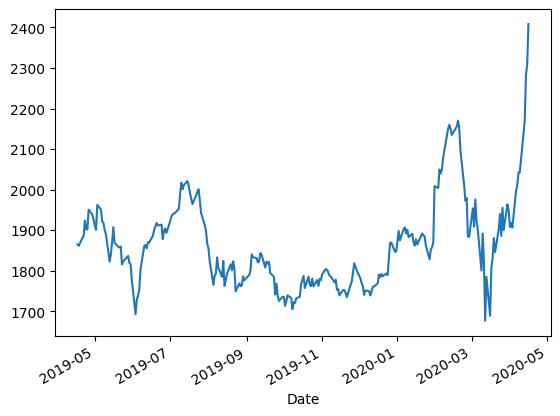

In [12]:
#AMZN.csv를 amazon으로 읽기
amazon = pd.read_csv( "AMZN.csv")
#amazon.Date컬럼을 pd.to_datetime 적용
amazon.index = pd.to_datetime(amazon["Date"])
#Date 컬럼을 지우기
amazon.drop("Date", axis=1, inplace=True)
amazon.Close.plot()
amazon.diff().dropna()  #differencing 차분
amazon.pct_change().dropna().Close  #수익율
np.log1p( amazon.pct_change().dropna().Close )  #로그수익율

In [13]:
# pykrx에서 00회사의 1년치 주가정보를 수집
!pip install pykrx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 21.4 MB/s eta 0:00:00


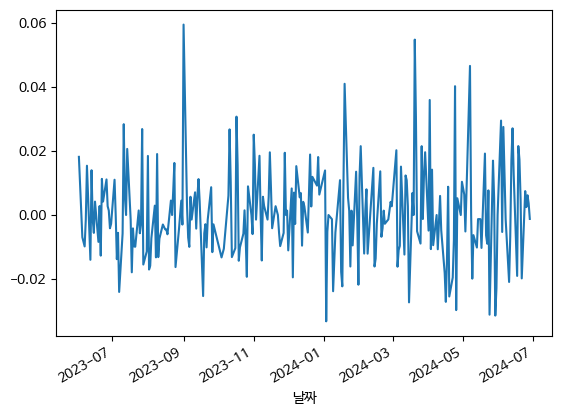

In [14]:
from pykrx import stock
df = stock.get_market_ohlcv_by_date("20230601", "20240630", "005930")

# 종가에 대해서 로그수익율, 수익율, 차분 구한 값들을 result라는 데이터프레임으로 묶어주세요
dif = df.diff().dropna().종가
ret = df.pct_change().dropna().종가
log_ret = np.log1p( df.pct_change().dropna().종가 )
result = pd.concat(   [dif, ret, log_ret     ], axis=1 )

# 로그수익율을 그리세요 ...
result.columns = ["차분", "수익율", "로그수익율"]
result.로그수익율.plot()

# 위의 데이터프레임을 csv로 만드세요  to_csv("파일명.csv")
result.to_csv("005930.csv")


- 시계열 데이터 to X, y

In [15]:
def make_sequence(time_series, n):  #시계열에서 1부터 n번째까지 선택해서 x로 지정, n+1번째값은 y, 이런 식으로 시계열 값을 계속 윈도우 n크기로 슬라이딩
    x_train, y_train = list(), list()

    for i in range(len(time_series)):
        x = time_series[i:(i + n)]
        if (i + n) < len(time_series):
            x_train.append(x)
            y_train.append(time_series[i + n])
        else:
            break

    return np.array(x_train), np.array(y_train)

n = 15
x_train, y_train = make_sequence(time_series, n)
x_train = x_train.reshape(-1, n, 1)
y_train = y_train.reshape(-1, 1)
print(x_train.shape)
print(y_train.shape)

(346, 15, 1)
(346, 1)


In [16]:
from sklearn.model_selection import train_test_split

partial_x_train = x_train[:30 * 11]
partial_y_train = y_train[:30 * 11]
x_test = x_train[30 * 11:]
y_test = y_train[30 * 11:]

print('train:', partial_x_train.shape, partial_y_train.shape)
print('test:',x_test.shape, y_test.shape)

train: (330, 15, 1) (330, 1)
test: (16, 15, 1) (16, 1)


In [17]:
test_arr = np.arange(100)
a, b = make_sequence(test_arr, 15)

for i in range(1, 4):
    print(a[i],'|', b[i])


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] | 16
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] | 17
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] | 18


#2. 시계열 분석
## - 통계적 기법: ARIMA

-정상 프로세스 VS 비정상 프로세스
 - 정상 프로세스(Stationary Process): 시계열 자료의 평균과 분산이 시간에 관계없이 일정한 겨우 (trend나 seasonality가 없는)
 - 비정상 프로세스(Non-stationary Process): 시계열 자료의 평균과 분산이 일정하지 않은 경우

- 정상 VS 비정상 비교를 위해서 ACF를 확인
 - Autocorrelation Function으로 특정 패턴이 없으면 정상 프로세스로 고려
 - ACF: 자기 상관 함수, k시간 단위로 구분된 시계열의 관측치 사이의 상관계수 함수, k가 커지면 ACF는 0에 가까워짐. 시차 k에 대한 두 관측치 상관계
 - t시점의 y와 t-k시점의 y의 ACF
 - ACF가 패턴이 없거나 갑자기 떨어지는 모습->정상 시계열
 -
 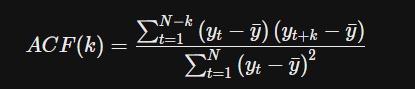
 - PACF(Partial ACF)
  - 부분상관(Partial Corr): 두 확률변수의 상관관계 중, 다른 변수들에 나타난 상관관계를 설명한 후에도, 여전히 남아있는 상관관계
  - PACF는 시계열 관측치 간의 상관관계, k시차에서의 '순수한' 상관관계(두 시점 사이 다른 관측치의 영향력은 제거)
  - t 시점의 y와 t-k 시점의 y의 편자기상관

- AR(Autoregressive) 모형: 자기 자신을 y로 하고, 시차 p인 이전 시점의 시계열 값들을 x변수로 하는 모형, 시차 p 를 하이퍼파라미터, 독립변수 간 독립성 가정 없음
- MA 모형(Moving Average): 자기 자신이 y이고, 해당 시점과 시차 q인 과거의 white noise error들이 x변수인 모형, 하이퍼파라미터는 시차 q
-  ARMA모형(Autoregressive Moving Average): 자기 자신을 y로 하고, 이전 시점(p)의 시계열과 white noise error들을 x변수로 하는 모형, p,q가 하이퍼파라미터
- ARIMA(Autoregressive Integrated Moving Average)모형: 위의 세 모형은 정상 프로세스에서의 경우, 비정상 프로세스는 차분을 통해 모형 적용, 차분을 d회 적용한 ARMA모형
 - 차분은 대체로 2회까지, 3회를 넘긴 경우 다른 모형 피팅

- 정상성(Stationarity)
 - 시계열 자료가 정상성이 결여된 경우 모형의 성능이 좋지 않을 수 있음
 - 정상성이란: 시계열 자료가 뚜렷한 트렌드 없이 값의 변동이 시간의 흐름에 따라 일정, stationarity
 - 정상성 여부의 검정: Dickey Fuller의 단위근 검정
  - 귀무가설: 비정상시계열 (단위근 있다)
  - 대립가설: 정상시계열(단위근 없다)

 - 비정상시계열인 경우: 시계열 자료 차분(differencing)하여 정상시계열로 변환 후 피팅



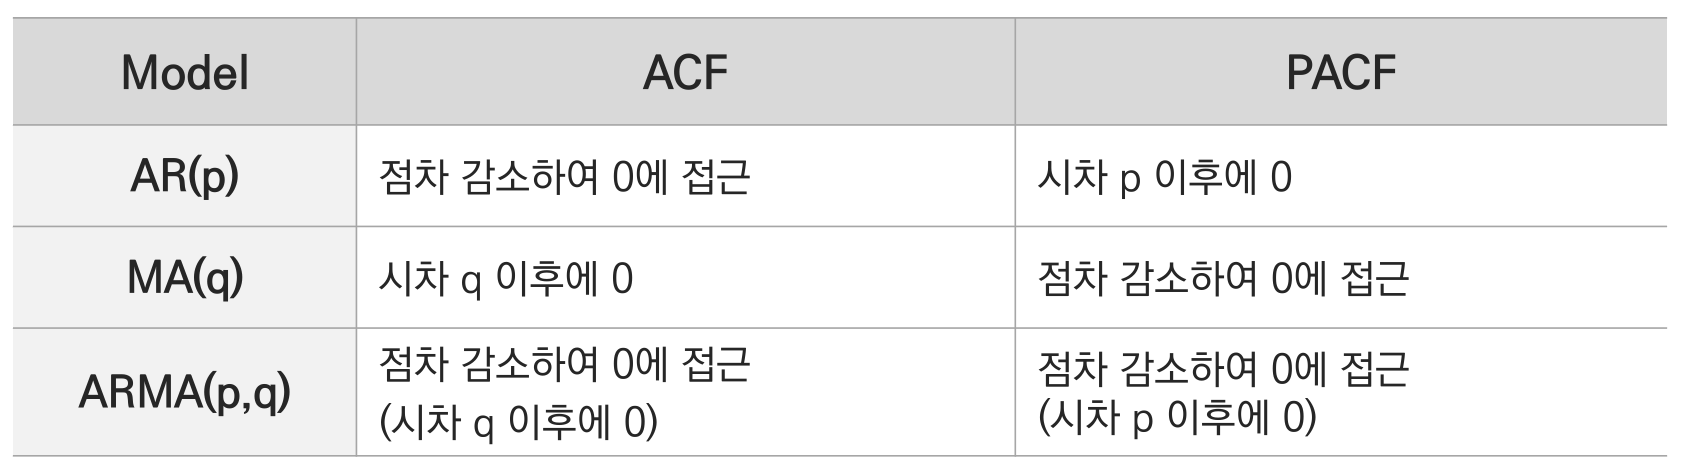

- ACF, PACF를 통해서 ARIMA 모형의 p,q를 결정, 자동으로 결정하게 시킴
- AR(P)
  - ACF: 점차 감소 소멸하는 형태
  - PACF: p 시차 이후 0으로 절단

- MA(q):
  - ACF: q 시차 이후 0으로 절단
  - PACF: 점차 감소 소멸하는 형태

- ARMA(p,q)
  - ACF: 시차 q 이후 부터 소멸
  - PACF: 시차 p 이후부터 소멸
  - 예: p + q < 2, p * q = 0, 대부분은 한 경향을 갖기 때문

- 모형 확인
 - Residuals에 대해서 ACF를 생성
 - 대부분이 영역 안에 들어오고, 40개 중 2-3개 까지는 영역 밖에 있어도 괜찮음

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dates = pd.date_range('2020-01-01', periods=48, freq='M')
timestamp = np.arange(len(dates))

trend_factor = timestamp*1.1
cycle_factor = 10*np.sin(np.linspace(0, 3.14*2, 48))
seasonal_factor = 7*np.sin(np.linspace(0, 3.14*8, 48))
np.random.seed(2004)
irregular_factor = 2*np.random.randn(len(dates))
df = pd.DataFrame(  {'timeseries': trend_factor + cycle_factor + seasonal_factor + irregular_factor,'trend': trend_factor,'cycle': cycle_factor,
                   'trend_cycle': trend_factor + cycle_factor,'seasonal': seasonal_factor,'irregular': irregular_factor},
                   index=dates)



/tmp/ipython-input-19-3088315507.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range('2020-01-01', periods=48, freq='M')


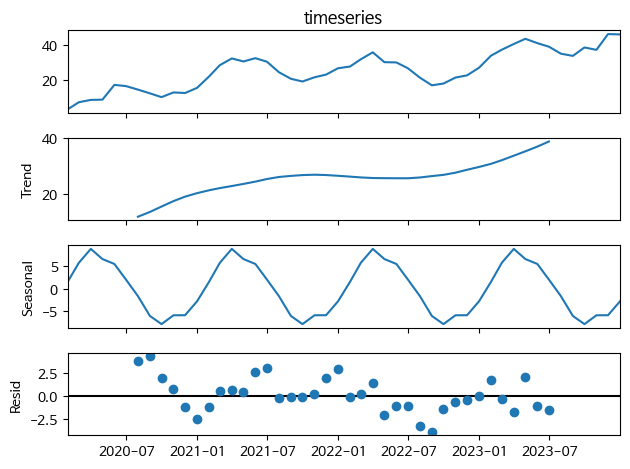

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df.timeseries, model='additive')
result.plot()
plt.show()


- 판매 데이터에 대한 ARIMA

/tmp/ipython-input-23-2705531099.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series = read_csv('product.txt', header=0, parse_dates=[0], index_col=0)


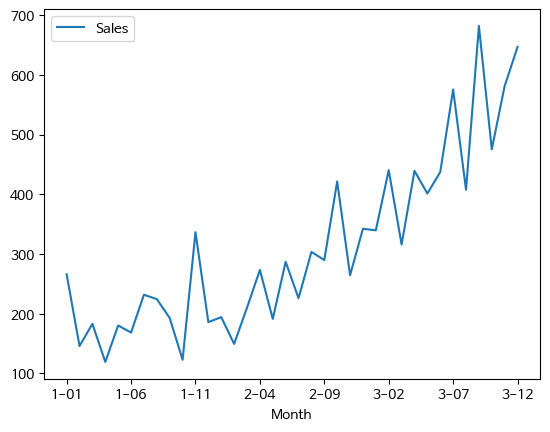

In [23]:
from pandas import read_csv
import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

series = read_csv('product.txt', header=0, parse_dates=[0], index_col=0)
series.plot()
pyplot.show()


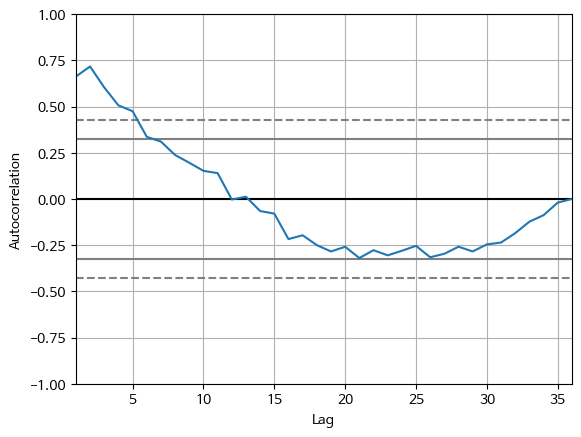

In [24]:
autocorrelation_plot(series)
pyplot.show()

In [25]:
month_return = series.pct_change().dropna()  #수익율
np.log( month_return.pct_change() + 1)  #로그수익율
(1+month_return).cumprod()-1  #누적수익율

/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,Sales
Month,
1-02,-0.451504
1-03,-0.311654
1-04,-0.551504
1-05,-0.322180
1-06,-0.366541
1-07,-0.128571
1-08,-0.156015
1-09,-0.275188
1-10,-0.537970


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a 

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Thu, 03 Jul 2025   AIC                            408.969
Time:                        17:26:29   BIC                            418.301
Sample:                             0   HQIC                           412.191
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

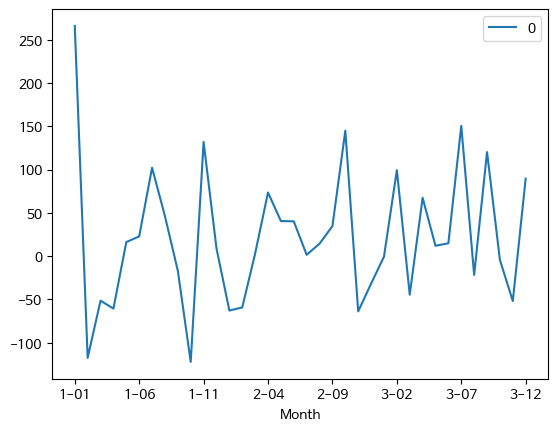

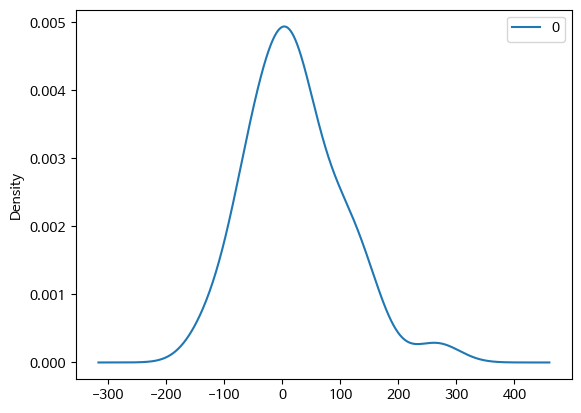

                0
count   36.000000
mean    21.936144
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147219
75%     68.848286
max    266.000000


In [26]:
from statsmodels.tsa.arima.model import ARIMA
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

- partitioning후 예측

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()


In [28]:
for t in range(len(test)):
  model = ARIMA(history, order=(5,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))


/tmp/ipython-input-28-691930748.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=343.272180, expected=342.300000
predicted=293.329674, expected=339.700000
predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220222, expected=439.300000
predicted=357.645324, expected=401.300000
predicted=443.047835, expected=437.400000
predicted=378.365674, expected=575.500000
predicted=459.415021, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231274, expected=475.300000
predicted=672.914944, expected=581.300000
predicted=531.541449, expected=646.900000


Test RMSE: 89.021


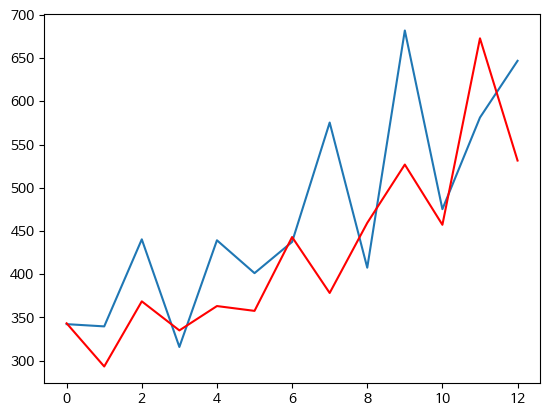

In [29]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

- 주가 시계열 데이터에 대한 예

In [34]:
import pandas as pd
data=pd.read_csv('AMZN.csv', header=0,index_col="Date")
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2019-04-17 to 2020-04-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8+ KB


,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,1864.800556,1883.242064,1846.651429,1866.393093,1866.393093,4.060800e+06
std,110.513502,116.543016,110.148293,114.338644,114.338644,2.035731e+06
min,1641.510010,1725.000000,1626.030029,1676.609985,1676.609985,8.813000e+05
25%,1778.007507,1793.577515,1762.510040,1783.422516,1783.422516,2.748850e+06
50%,1842.005005,1870.639954,1826.875000,1854.284973,1854.284973,3.410900e+06
75%,1921.224945,1936.729981,1898.567535,1912.812469,1912.812469,4.754375e+06
max,2346.000000,2461.000000,2335.000000,2408.189941,2408.189941,1.556730e+07


In [35]:
print(data.head())

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-04-17  1872.989990  1876.469971  1860.439941  1864.819946  1864.819946   
2019-04-18  1868.790039  1870.819946  1859.479980  1861.689941  1861.689941   
2019-04-22  1855.400024  1888.420044  1845.640015  1887.310059  1887.310059   
2019-04-23  1891.199951  1929.260010  1889.579956  1923.770020  1923.770020   
2019-04-24  1925.000000  1929.689941  1898.160034  1901.750000  1901.750000   

             Volume  
Date                 
2019-04-17  2893500  
2019-04-18  2749900  
2019-04-22  3373800  
2019-04-23  4640400  
2019-04-24  3675800  


In [36]:
data.shape

(252, 6)

In [37]:
from statsmodels.tsa.stattools import adfuller    #종가의 정상성 여부 점검
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd  #데이터프레임.diff()

In [38]:
#AMZN.csv를 읽으셔서->Adj.Close값에 대해서 ARIMA 피팅
data0 = pd.read_csv("AMZN.csv")
data0.shape

(252, 7)

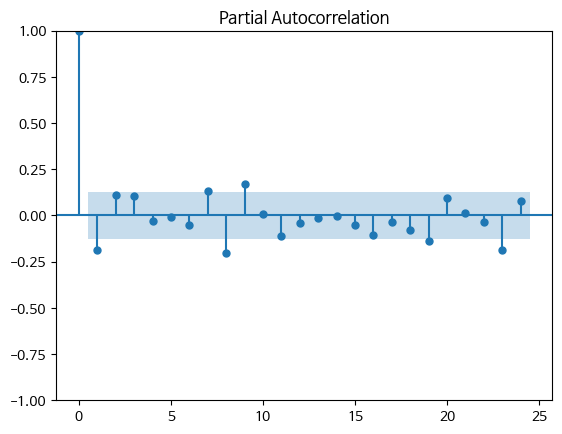

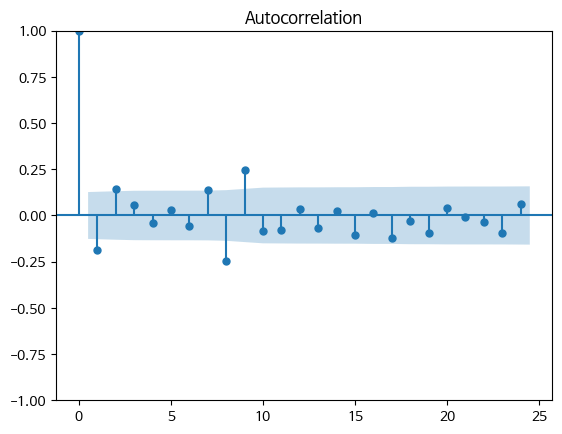

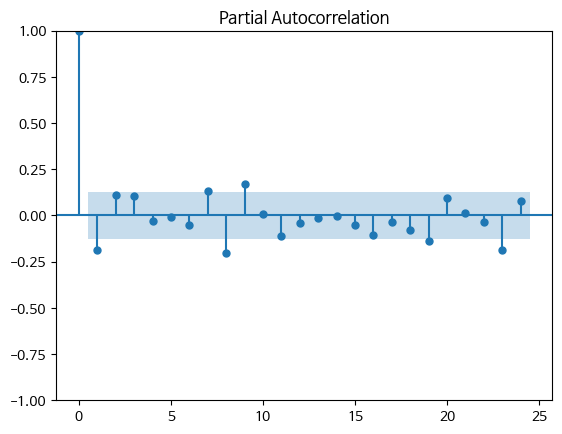

In [39]:
data = data0.iloc[0:240,:]
test = data0.iloc[240:, :]
data.columns
adfuller(data["Adj Close"].diff().dropna()) #d:1
series = data["Adj Close"].diff().dropna()
plot_acf(series)  #q: 2
plot_pacf( series ) #p: 2

In [40]:
#p,d,q = (1,1,1)
model1 = ARIMA( data["Adj Close"], order=(3,1,1)).fit()
print(model1.summary())
#SARIMAX, LSTM, GRU....

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  240
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -1170.083
Date:                Thu, 03 Jul 2025   AIC                           2350.166
Time:                        17:30:33   BIC                           2367.548
Sample:                             0   HQIC                          2357.171
                                - 240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9876      0.103     -9.629      0.000      -1.189      -0.787
ar.L2         -0.0077      0.070     -0.110      0.912      -0.145       0.130
ar.L3          0.1943      0.055      3.557      0.0

In [41]:
np.mean( (model1.forecast(12) - test["Adj Close"])**2 )**0.5 #RMSE

np.float64(205.18138273862726)

In [42]:
#!pip install statsmodels
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller    #종가의 정상성 여부 점검
result=adfuller(data['Close'])
print(result) #0.5933이 p-value, 비정상 시계열

(np.float64(-2.9217621203516497), np.float64(0.04287525460245805), 9, 230, {'1%': np.float64(-3.459105583381277), '5%': np.float64(-2.8741898504150574), '10%': np.float64(-2.5735117958412097)}, np.float64(2189.3010749622676))


- acf, pacf
 - acf: 자기상관함수, autocorrelation function, k기간 떨어진 값들의 상관 계수
 - pacf: 편자기상관함수, partial autocorrelation function, 서로 다른 두 지점 사이의 관계를 분석할때, 중간에 있는 값들의 영향을 제외시킨 상관계수

 - p가 증가 시, 지수적 감소 혹은 절단 형태여야 정상성, 둘 중 하나라도 느리게 감소하거나 증가 시 비정상성

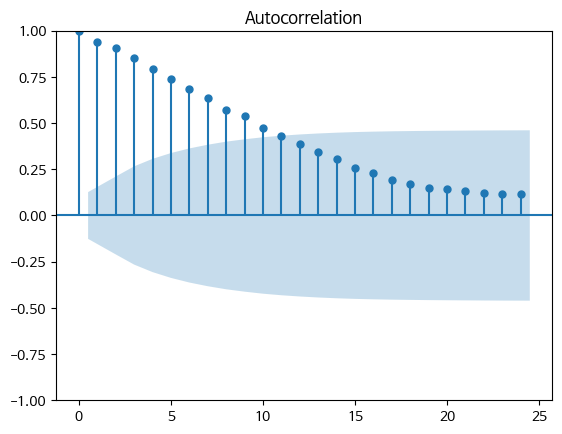

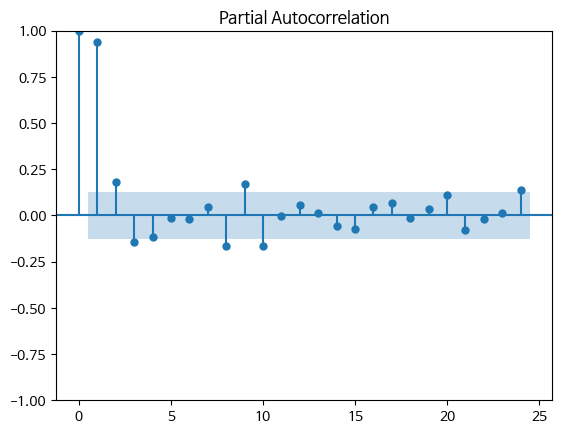

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['Close']) #느리게 감소, 비정상시계열
plot_pacf(data['Close'])
plt.show()

In [45]:
data["Close"].diff() #differencing 차이를 구해줌 ->주가가 아닌 경우에 사용

,Close
0,NaN
1,-3.130005
2,25.620118
3,36.459961
4,-22.020020
...,...
235,37.270020
236,-54.260010
237,69.650024
238,-55.390014


count    239.000000
mean       0.000217
std        0.018283
min       -0.082535
25%       -0.008060
50%        0.000263
75%        0.008613
max        0.071196
Name: Close, dtype: float64


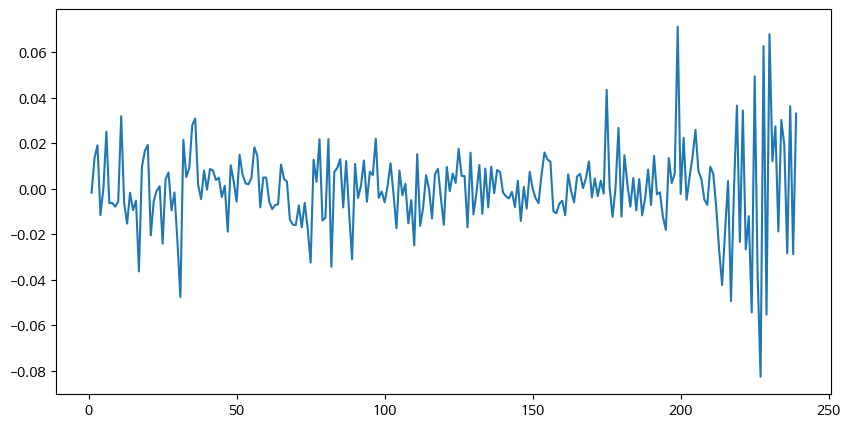

In [47]:
import numpy as np
datapct=data.Close.pct_change()   #주가인 경우 수익율
logreturn=np.log(1+datapct) #로그수익율
logreturn.head()
print(logreturn.describe())
plt.figure(figsize=(10,5))
plt.plot(logreturn)
plt.show()

In [48]:
logreturn.dropna()  #NAN을 제거

,Close
1,-0.001680
2,0.013668
3,0.019134
4,-0.011512
5,0.000263
...,...
235,0.019397
236,-0.028366
237,0.036267
238,-0.028734


In [49]:
from statsmodels.tsa.stattools import adfuller
logreturn=logreturn.dropna()
result=adfuller(logreturn) #p-value < 0.05
print(result)

(np.float64(-4.4875660755851285), np.float64(0.0002070666565204063), 8, 230, {'1%': np.float64(-3.459105583381277), '5%': np.float64(-2.8741898504150574), '10%': np.float64(-2.5735117958412097)}, np.float64(-1168.0386740968868))


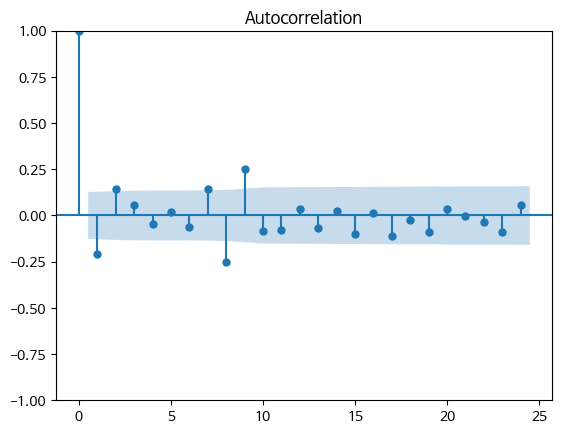

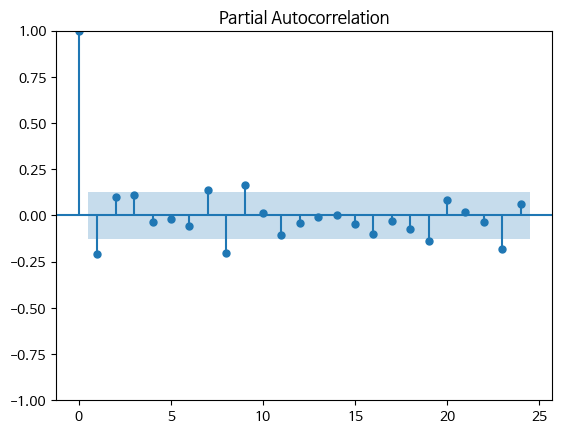

<class 'pandas.core.series.Series'>


In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(logreturn)
plot_pacf(logreturn) #그림에서 절단이 일어나는 위치를 p의 값으로 지정, 24?
plt.show()
print(type(logreturn))

- 모형 검정

In [51]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['Close'], order=(0,2,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  240
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -1178.159
Date:                Thu, 03 Jul 2025   AIC                           2360.318
Time:                        17:31:53   BIC                           2367.263
Sample:                             0   HQIC                          2363.117
                                - 240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9988      0.128     -7.825      0.000      -1.249      -0.749
sigma2      1142.5504    150.680      7.583      0.000     847.223    1437.878
Ljung-Box (L1) (Q):                   8.53   Jarque-

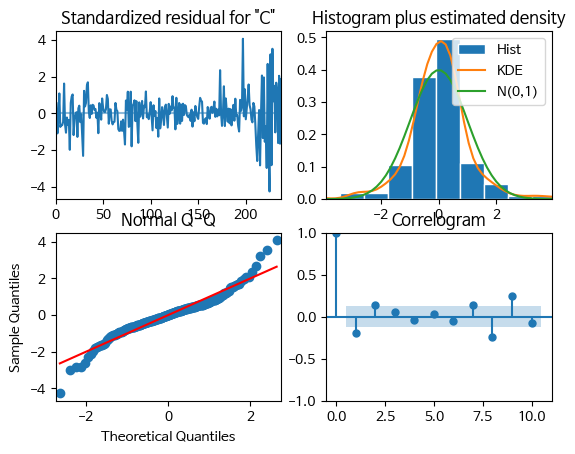

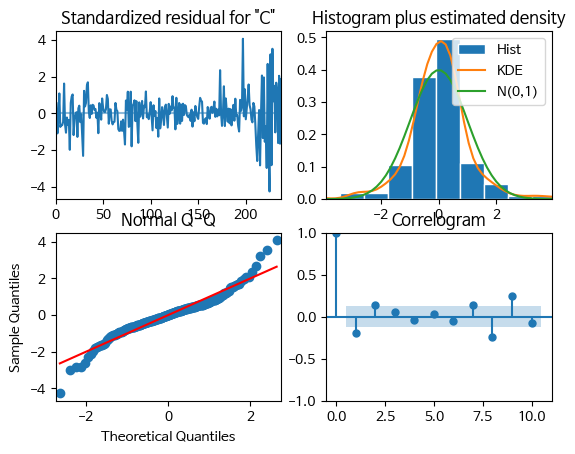

In [52]:
model_fit.plot_diagnostics()

In [53]:
forecasted = model_fit.forecast(steps=1)
print(forecasted)

240    1964.386067
dtype: float64


- 다양한 p,d,q 확인

In [54]:
import itertools

p = range(0,3)
d = range(1,2)
q = range(0,6)

pdq = list(itertools.product(p,d,q))

aic = []
params = []

for i in pdq:
        try:
            model = ARIMA(data["Close"], order=(i))
            model_fit = model.fit()
            aic.append(round(model_fit.aic,2))
            params.append((i))
        except:
            continue

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/st

In [55]:
optimal = [(params[i],j) for i,j in enumerate(aic) if j == min(aic)]
model_opt = ARIMA(data["Close"], order = optimal[0][0])
model_opt_fit = model_opt.fit()
model_opt_fit.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  240
Model:                 ARIMA(2, 1, 5)   Log Likelihood               -1165.766
Date:                Thu, 03 Jul 2025   AIC                           2347.532
Time:                        17:32:56   BIC                           2375.343
Sample:                             0   HQIC                          2358.739
                                - 240                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6202      0.045    -35.888      0.000      -1.709      -1.532
ar.L2         -0.8875      0.045    -19.646      0.000      -0.976      -0.799
ma.L1          1.5435      0.068     22.612      0.000       1.410       1.677
ma.L2          0.8567      0.095      9.022      0.000       0.671       1.043
ma.L3          0.1658      0.113      1.469      0.142      -0.055       0.387
ma.L4          0.3225      0.101      3.186      0.001       0.124       0.521
ma.L5          0.2256      0.052      4.332      0.000       0.124       0.328
sigma2       946.9289     55.273     17.132      0.000     838.595    1055.263
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                91.51
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               2.38   Skew:                             0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
model = ARIMA(data["Close"], order=optimal[0][0])
model_fit = model.fit()
forecast = model_fit.forecast(steps=24*7)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


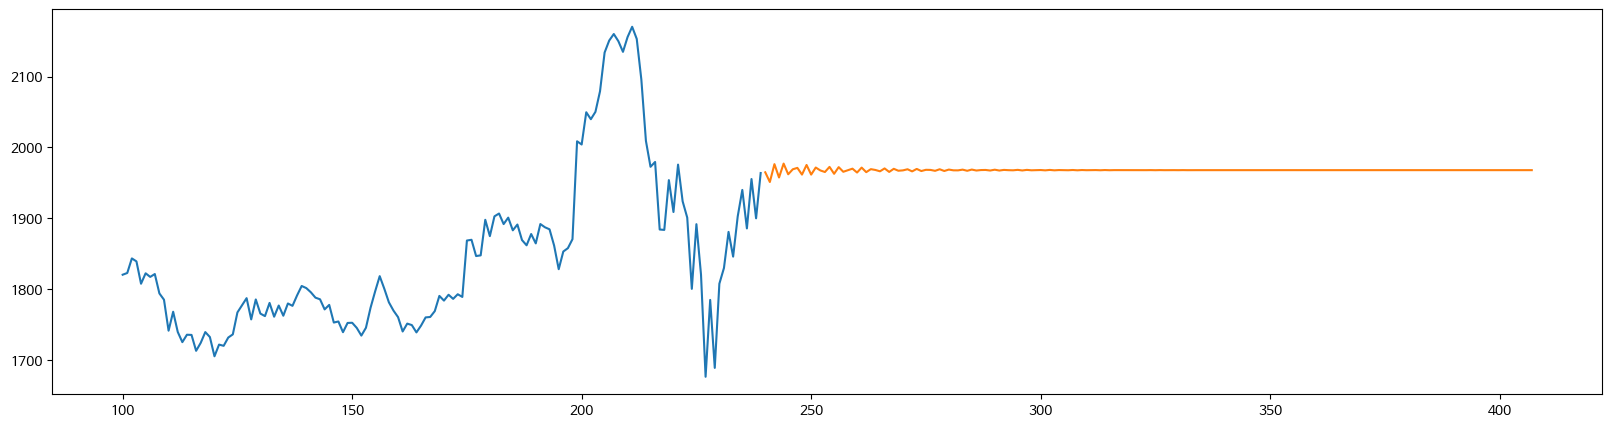

In [59]:
plt.figure(figsize=(20,5))
plt.plot(range(100,240), data["Close"].iloc[100:])
plt.plot(forecast)

## 자동으로 p,d, q 확인

In [60]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 69.8 MB/s eta 0:00:00


In [67]:
!pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 95.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [7]:
# import necessary libraries
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
import pandas as pd
import numpy as np

data_actual = pd.read_csv("AMZN.csv")["Close"]

# set seasonal to True
seasonal = True

# use pmdarima to automatically select best ARIMA model
model = pm.auto_arima(data_actual,
                      m=12,               # frequency of series
                      seasonal=seasonal,  # TRUE if seasonal series
                      d=0,             # let model determine 'd'
                      test='adf',         # use adftest to find optimal 'd'
                      start_p=0, start_q=0, # minimum p and q
                      max_p=12, max_q=12, # maximum p and q
                      D=None,             # let model determine 'D'
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

# print model summary
print(model.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=3065.744, Time=2.05 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=3106.682, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2527.836, Time=2.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2843.324, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=4514.094, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2527.511, Time=0.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=2527.775, Time=0.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=2529.769, Time=0.96 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=2527.415, Time=0.41 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=nan sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=2528.381, Time=3.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=2520.533, Time=0.50 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(1,0,0)[12] intercept   : AIC=2521.533, Time=1.46 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,1)[12] intercept   : AIC=2521.547, Time=0.99 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(1,0,1)[12] intercept   : AIC=2523.590, Time=1.44 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,0)(0,0,0)[12] intercept   : AIC=2516.528, Time=0.23 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,0)(1,0,0)[12] intercept   : AIC=2518.156, Time=0.90 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,0)(0,0,1)[12] intercept   : AIC=2518.220, Time=0.50 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,0)(1,0,1)[12] intercept   : AIC=2519.958, Time=0.68 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,0)(0,0,0)[12] intercept   : AIC=2518.505, Time=0.36 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[12] intercept   : AIC=2518.260, Time=0.50 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[12] intercept   : AIC=2516.742, Time=0.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,1)(0,0,0)[12] intercept   : AIC=2520.198, Time=0.88 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,0)(0,0,0)[12]             : AIC=inf, Time=2.19 sec

Best model:  ARIMA(4,0,0)(0,0,0)[12] intercept
Total fit time: 23.982 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  252
Model:               SARIMAX(4, 0, 0)   Log Likelihood               -1252.264
Date:                Thu, 03 Jul 2025   AIC                           2516.528
Time:                        17:40:13   BIC                           2537.704
Sample:                             0   HQIC                          2525.049
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     44.8028     38.069      1.177      0.239     -29.812   

- Time series로 X, y 생성하기

In [8]:
def make_sequence(time_series, n):  #시계열에서 1부터 n번째까지 선택해서 x로 지정, n+1번째값은 y, 이런 식으로 시계열 값을 계속 윈도우 n크기로 슬라이딩
    x_train, y_train = list(), list()

    for i in range(len(time_series)):
        x = time_series[i:(i + n)]
        if (i + n) < len(time_series):
            x_train.append(x)
            y_train.append(time_series[i + n])
        else:
            break

    return np.array(x_train), np.array(y_train)


In [9]:
# amazon.com의 close 컬럼을 사용하여 sequence를 만들기 (make_sequence, time step=....
data = pd.read_csv("AMZN.csv")
x_train, y_train = make_sequence( data.Close.values, 3)
x_train = x_train.reshape( -1, 3, 1)
y_train = y_train.reshape( -1, 1)

# 1.5 처음부터225개까지가 train, 226~252까지 test
x_train2 = x_train[ : 225]
y_train2 = y_train[ : 225]
x_test = x_train[ 225: ]
y_test = y_train[ 225: ]

In [13]:
datapct=data.Close.pct_change()   #주가인 경우 수익율
logreturn=np.log(1+datapct) #로그수익율
logreturn.head()
print(logreturn.describe())


count    251.000000
mean       0.001019
std        0.019030
min       -0.082535
25%       -0.007880
50%        0.000514
75%        0.008992
max        0.071196
Name: Close, dtype: float64


In [14]:
#로그 수익율에 대해 적용
logr1=logreturn.values
logr=logr1.reshape(1,-1)
inte=13 #pacf의 p값
x=[]
y=[]
for i in range(logr.shape[1]):
    if i+inte>logr.shape[1]-1:
        break
    else:
         xx=logr[0,i:i+inte]
         x.append(xx)
         yy=logr[0,i+inte]
         y.append(yy)
x=np.array(x)
y=np.array(y)
x_train=x[:100]
x_test=x[100:]
y_train=y[:100]
y_test=y[100:]